## 딥러닝을 위한 기초수학

#### ▪ 함수 : 두 집합 사이의 관계를 설명하는 수학 개념
#### ▪ 변수 x와 y가 있을 때, x가 변하면 이에 따라 y는 어떤 규칙으로 변하는지를 나타냄
#### ▪ 보통 함수를 나타낼 때는 function의 f와 변수 x를 사용해 라고 표시함
#### ▪ 일차 함수 : x가 y에 관한 일차식으로 표현된 경우를 말함  y = ax + b(a!=0)
#### ▪ x가 일차인 형태이며 x가 일차로 남으려면 a는 0이 아니어야 함
#### ▪ 일차 함수식 y=ax+b에서 a는 기울기, b는 절편이라고 함

#### ▪ 딥러닝의 수학 원리를 배울 때 초반부터 이 식이 등장함
#### ▪ x가 주어지고 원하는 y값이 있을 때 적절한 a 와 b 를 찾는 것,
#### 이것이 바로 딥러닝을 설명하는 가장 간단한 표현임

## 예측선 긋기 : 선형회귀

#### 전제 : ‘x값이 변함에 따라 y값도 변한다’
#### 독립 변수 : 독립적으로 변할 수 있는 x값
#### 종속 변수 : 독립 변수에 따라 종속적으로 변하는 값
#### 선형 회귀 : 독립 변수 x를 사용해 종속 변수 y의 움직임을 예측하고 설명하는 작업
#### 단순 선형 회귀(simple linear regression) : 하나의 x값 만으로도 y값 설명 가능
#### 다중 선형 회귀(multiple linear regression) : y값 설명에 x값이 여러 개 필요할 때

In [1]:
import numpy as np

# x값과 y값
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

# x와 y의 평균값
mx = np.mean(x)
my = np.mean(y)
print("x의 평균값: ", mx)
print("y의 평균값: ", my)

x의 평균값:  5.0
y의 평균값:  90.5


In [2]:
# 기울기 공식의 분모
# divisor(분모) : x의 각 원소와 x의 평균값들의 차를 제곱해서 더한다.
divisor = sum([(mx - i) ** 2 for i in x])

# 기울기 공식의 분자
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    
    return d

dividend = top(x, mx, y, my)

print("분모:", divisor)
print("분자:", dividend)

분모: 20.0
분자: 46.0


In [3]:
# 기울기와 y절편 구하기
a = dividend / divisor
b = my - (mx * a)

In [4]:
# 출력으로 확인
print("기울기 a =", a)
print("y 절편 b =", b)

기울기 a = 2.3
y 절편 b = 79.0


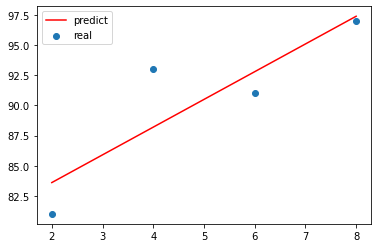

In [5]:
from matplotlib import pyplot as plt 

predict = []

for i in x:
    pre_y = a * i + b
    predict.append(pre_y)

plt.scatter(x, y, label = 'real')
plt.plot(x, predict, c='r', label='predict')
plt.legend()

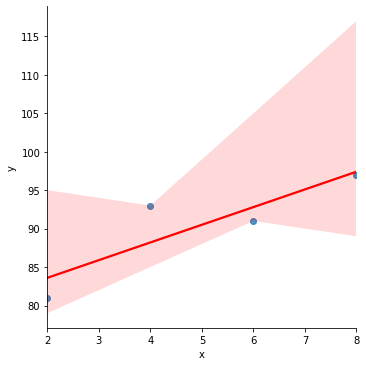

In [6]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y})

sns.lmplot(x = 'x', y = 'y', data = df, line_kws = {'color': 'red'})

In [7]:
import numpy as np

# 가상의 기울기 a와 y절편 b
fake_a_b = [3, 76]

# x값과 y값
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# y = ax + b에 a, b값 대입하여 결과를 출력하는 함수
def predict(x):
    return fake_a_b[0] * x + fake_a_b[1]

# MSE 함수 : 평균제곱오차를 계산해주는 함수
def mse(y, y_hat):
    return ((y - y_hat) ** 2).mean()

# MSE 함수를 각 y값에 대입하여 최종 값을 구하는 함수
def mse_val(y, predict_result):
    return mse(np.array(y), np.array(predict_result))

#예측값이 들어갈 빈 리스트
predict_result = []

# 모든 x값을 한번씩 대입하여 predict_result 리스트 완성.
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))
    
# 최종 MSE 출력
print("MSE 최종값: " + str(mse_val(predict_result, y))) #처음 가정한 a=3, b=76은 오초가 약 11.0이라는 것 확인

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100
MSE 최종값: 11.0
